# 3.2 Image Segmentation Using Data Classification

This notebook implements image segmentation using Support Vector Machines (SVM) classification. We'll follow these steps:
1. Load and prepare the image
2. Create binary mask
3. Extract features
4. Split data into training/testing sets
5. Train an SVM classifier

We'll use a tulip image as our example and demonstrate how machine learning can be used for image segmentation.

## Import Required Libraries

In [1]:
# Import required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler


## 3.2.1 Load Image
First, we'll create a function to load and display the image. The function converts BGR to RGB color space since OpenCV uses BGR by default.

In [2]:
# 3.2.1 Load image
def load_image(path):
    img = cv2.imread(path)
    if img is not None:
        return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    else:
        raise FileNotFoundError(f"Could not load image from {path}")

## 3.2.2 Create Binary Mask
Next, we'll convert the image to grayscale and create a binary mask using thresholding. This will serve as our ground truth for training the classifier.

In [3]:
# 3.2.2 Convert to grayscale and create binary mask
def create_binary_mask(image, threshold=128):
    grayscale = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    # Create a binary mask: 1 where pixel intensity > threshold, 0 elsewhere
    _, binary_mask = cv2.threshold(grayscale, threshold, 255, cv2.THRESH_BINARY)
    
    # Normalize mask: 0 and 1 (instead of 0 and 255)
    binary_mask = (binary_mask // 255).astype(np.uint8)
    
    return grayscale, binary_mask

## 3.2.3 Feature Extraction
We'll extract features from the grayscale image and prepare labels from the binary mask. Each pixel's intensity will be a feature, and its corresponding binary mask value will be the label.

In [4]:
# 3.2.3 Extract features and flatten mask
def extract_features_and_labels(grayscale_image, binary_mask):
    # Feature: each pixel intensity (you could extract more features if needed)
    features = grayscale_image.flatten().reshape(-1, 1)  # shape (num_pixels, 1)
    
    # Labels: mask values (0 or 1)
    labels = binary_mask.flatten()  # shape (num_pixels,)
    
    return features, labels

## Testing Initial Implementation
Let's test our implementation of the first three steps (3.2.1 to 3.2.3) to verify:
- Image loading functionality
- Binary mask creation
- Feature extraction

This test will display:
1. The original RGB image
2. The grayscale version
3. The binary mask

It will also print the shapes of our features and labels to confirm proper dimensionality for machine learning.

In [5]:
# Example usage
def main():
    try:
        # Load your image
        image_path = "../part2/tulips.png"  # Replace with your image
        image = load_image(image_path)
        
        # Create grayscale and binary mask
        grayscale_img, binary_mask = create_binary_mask(image, threshold=100)  # you can tune the threshold
        
        # Extract features and labels
        features, labels = extract_features_and_labels(grayscale_img, binary_mask)
        
        print(f"Features shape: {features.shape}")
        print(f"Labels shape: {labels.shape}")
        
        # Visualize
        fig, axs = plt.subplots(1, 3, figsize=(15, 5))
        axs[0].imshow(image)
        axs[0].set_title("Original Image")
        axs[0].axis('off')
        
        axs[1].imshow(grayscale_img, cmap='gray')
        axs[1].set_title("Grayscale Image")
        axs[1].axis('off')
        
        axs[2].imshow(binary_mask, cmap='gray')
        axs[2].set_title("Binary Mask")
        axs[2].axis('off')
        
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"Error: {e}")

Features shape: (393216, 1)
Labels shape: (393216,)


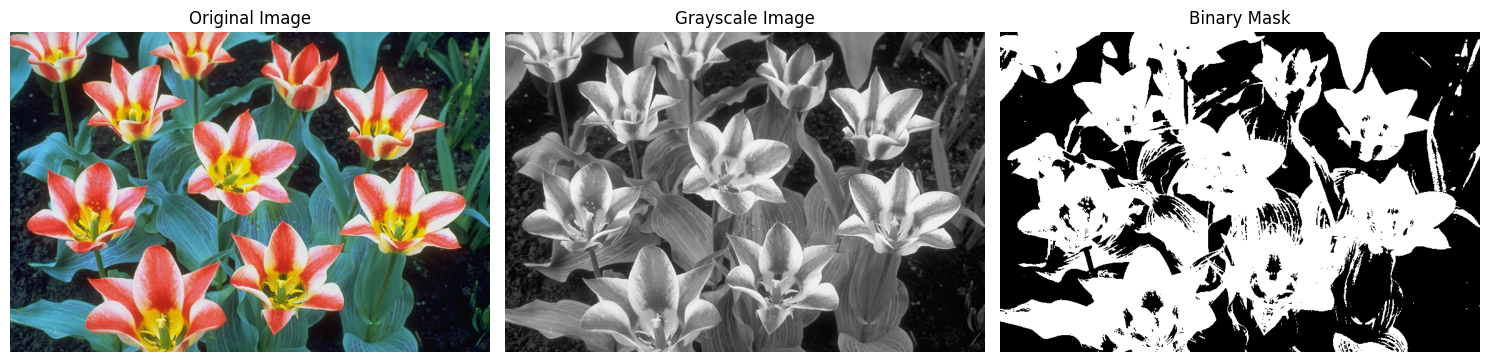

In [6]:
main()

## 3.2.4 Data Splitting and 3.2.5 SVM Classification
Finally, we'll implement the machine learning part:
1. Split the data into training and testing sets
2. Scale the features
3. Train an SVM classifier
4. Evaluate the results

In [7]:
# 3.2.4 Split data into training and testing sets
def prepare_training_data(features, labels, test_size=0.2):
    """Split the data into training and testing sets."""
    # Scale the features
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        features_scaled, labels, 
        test_size=test_size, 
        random_state=42
    )
    
    return X_train, X_test, y_train, y_test, scaler

# 3.2.5 Create and train SVM classifier
def train_svm_classifier(X_train, y_train):
    """Create and train an SVM classifier."""
    svm = SVC(kernel='rbf', C=1.0)
    svm.fit(X_train, y_train)
    return svm

## Results
Let's put everything together and visualize the results.

Training accuracy: 1.000
Testing accuracy: 1.000


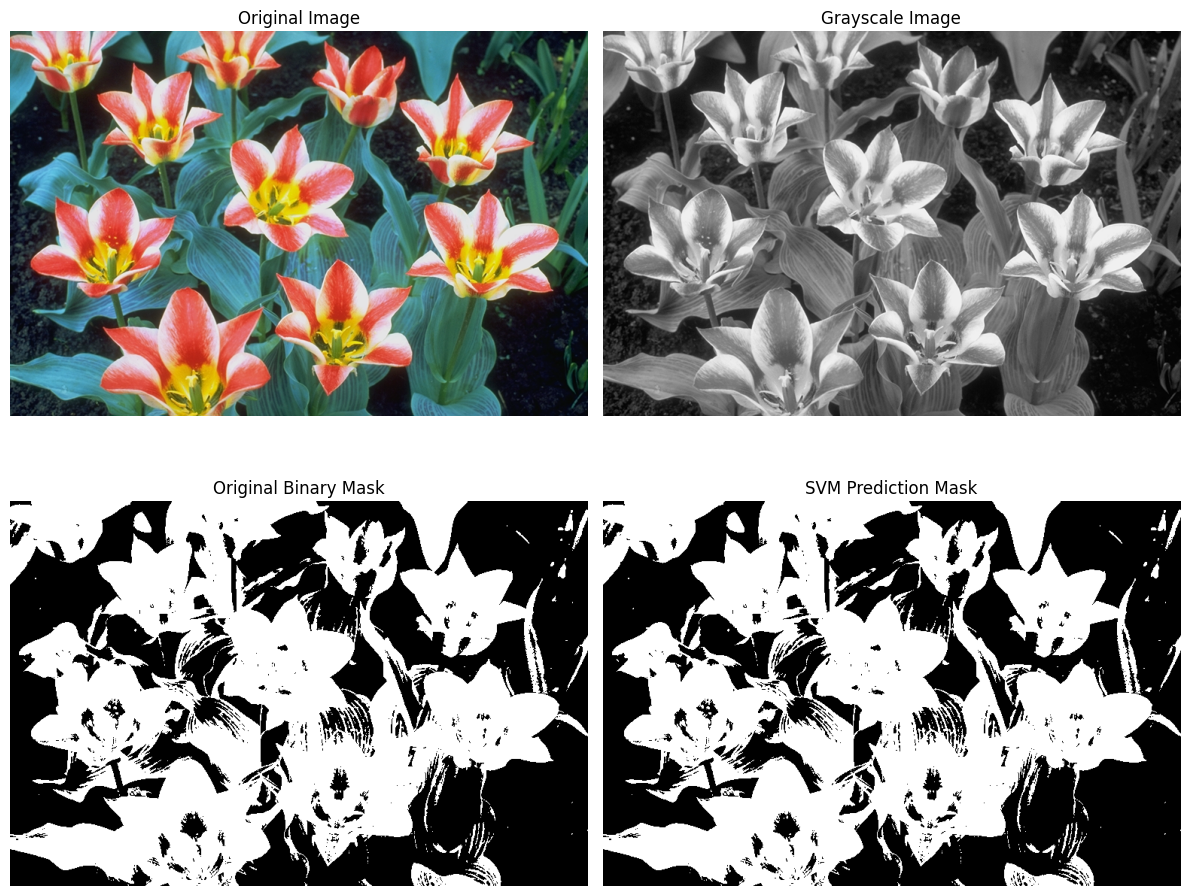

In [8]:

# Test the classifier
try:
    # Load and prepare image
    image_path = "../part2/tulips.png"
    image = load_image(image_path)
    grayscale_img, binary_mask = create_binary_mask(image, threshold=100)
    features, labels = extract_features_and_labels(grayscale_img, binary_mask)
    
    # Prepare training data
    X_train, X_test, y_train, y_test, scaler = prepare_training_data(features, labels)
    
    # Train SVM
    svm_classifier = train_svm_classifier(X_train, y_train)
    
    # Evaluate the classifier
    train_accuracy = svm_classifier.score(X_train, y_train)
    test_accuracy = svm_classifier.score(X_test, y_test)
    
    print(f"Training accuracy: {train_accuracy:.3f}")
    print(f"Testing accuracy: {test_accuracy:.3f}")
    
    # Create prediction mask using the trained classifier
    features_scaled = scaler.transform(features)
    predictions = svm_classifier.predict(features_scaled)
    prediction_mask = predictions.reshape(grayscale_img.shape)
    
    # Visualize results
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    
    axs[0, 0].imshow(image)
    axs[0, 0].set_title("Original Image")
    axs[0, 0].axis('off')
    
    axs[0, 1].imshow(grayscale_img, cmap='gray')
    axs[0, 1].set_title("Grayscale Image")
    axs[0, 1].axis('off')
    
    axs[1, 0].imshow(binary_mask, cmap='gray')
    axs[1, 0].set_title("Original Binary Mask")
    axs[1, 0].axis('off')
    
    axs[1, 1].imshow(prediction_mask, cmap='gray')
    axs[1, 1].set_title("SVM Prediction Mask")
    axs[1, 1].axis('off')
    
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f"Error: {e}")